In [ ]:
import pandas as pd


df = pd.read_csv("bike_sales_100k.csv")


df["Date"] = pd.to_datetime(df["Date"], dayfirst=True, errors="coerce")
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month


df["TotalPrice"] = df["Price"] * df["Quantity"]

df.columns = [col.strip().replace(" ", "_") for col in df.columns]


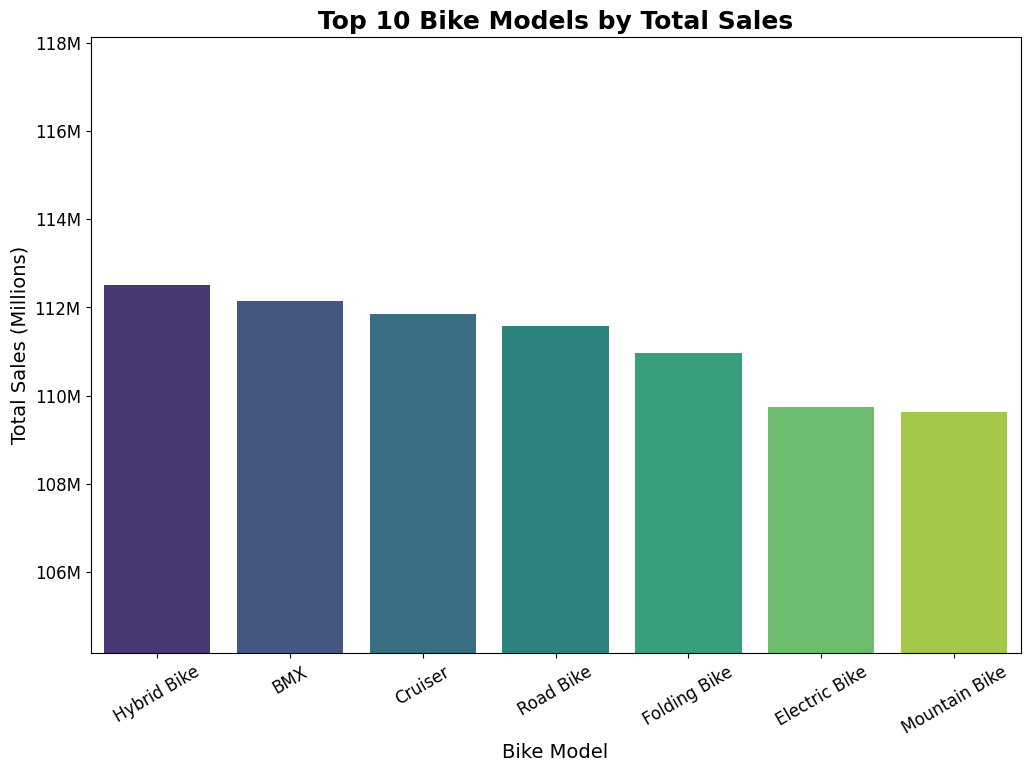

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

# Group sales by bike model (Top 10)
bike_sales = df.groupby("Bike_Model")["TotalPrice"].sum().sort_values(ascending=False).head(10).reset_index()
plt.figure(figsize=(12,8))
sns.barplot(data=bike_sales, x="Bike_Model", y="TotalPrice", hue="Bike_Model", palette="viridis", legend=False)
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x/1e6)}M'))
plt.ylim(bike_sales["TotalPrice"].min()*0.95, bike_sales["TotalPrice"].max()*1.05)
plt.title("Top 10 Bike Models by Total Sales", fontsize=18, fontweight="bold")
plt.xlabel("Bike Model", fontsize=14)
plt.ylabel("Total Sales (Millions)", fontsize=14)
plt.xticks(rotation=30, fontsize=12)
plt.yticks(fontsize=12)
plt.show()


In [ ]:
در این بخش ما بررسی کردیم که کدام مدل‌های دوچرخه بیشترین فروش را داشته‌اند
برای این کار فروش کل هر مدل را محاسبه کردیم و ده مدل برتر را انتخاب کردیم
نموداری که می‌بینید نشان می‌دهد کدام مدل‌ها بیشترین سهم را از فروش داشته‌اند و مقایسه بین آن‌ها راحت‌تر شده است


Customer_Gender,Female,Male
Bike_Model,,
BMX,"57,105,430","55,040,684"
Cruiser,"56,736,105","55,112,987"
Electric Bike,"55,128,814","54,621,346"
Folding Bike,"56,052,540","54,914,279"
Hybrid Bike,"56,694,879","55,810,632"
Mountain Bike,"54,851,614","54,785,353"
Road Bike,"55,744,967","55,834,607"


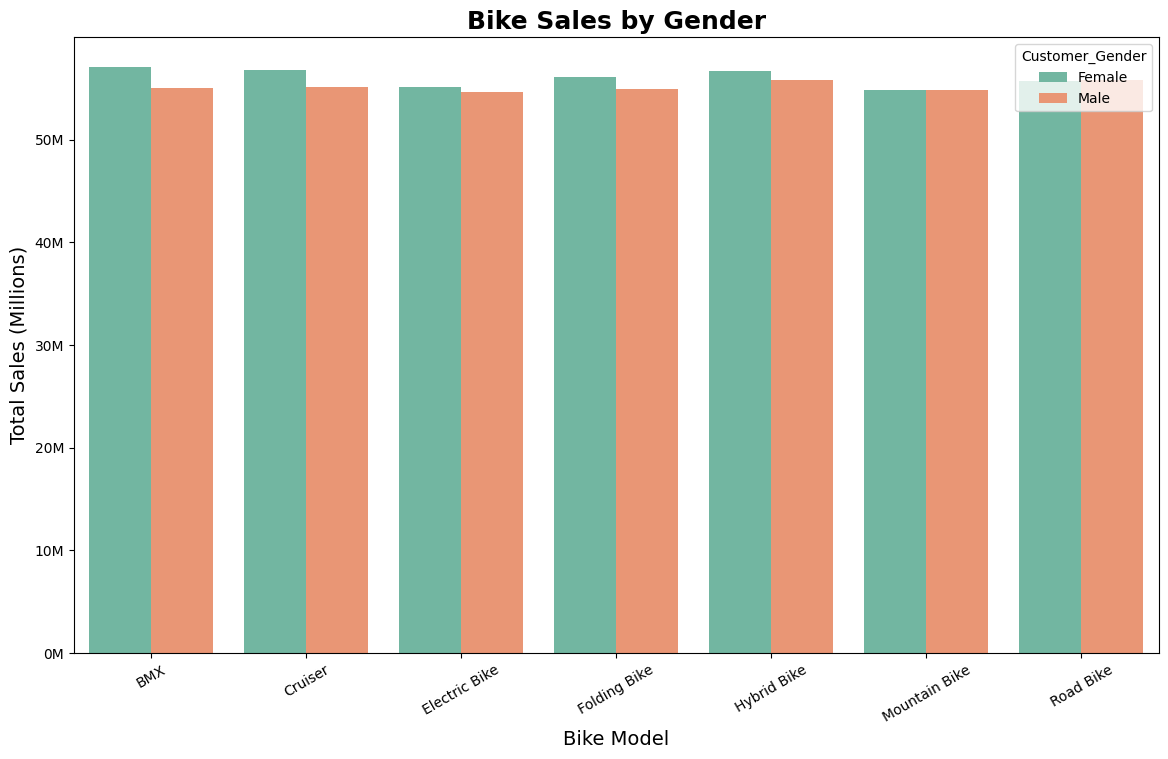

In [ ]:

gender_sales = df.groupby(["Bike_Model", "Customer_Gender"])["TotalPrice"].sum().reset_index()
# Table
display(
    gender_sales.pivot(index="Bike_Model", columns="Customer_Gender", values="TotalPrice")
    .style.format("{:,.0f}")
    .background_gradient(cmap="Purples", axis=None)
)
# Plot
plt.figure(figsize=(14,8))
sns.barplot(data=gender_sales, x="Bike_Model", y="TotalPrice", hue="Customer_Gender", palette="Set2")
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x/1e6:.0f}M'))
plt.title("Bike Sales by Gender", fontsize=18, fontweight="bold")
plt.xlabel("Bike Model", fontsize=14)
plt.ylabel("Total Sales (Millions)", fontsize=14)
plt.xticks(rotation=30)
plt.show()

در نگاه کلی سهم خرید زنان و مردان تقریباً برابر است و می‌توان گفت هر دو گروه به یک اندازه به دوچرخه‌ها علاقه نشان داده‌اند  
البته در مدل بی ام ایکس زنان کمی بیشتر از مردان خرید داشته‌اند و در رود بایک مردان اندکی پیشتازند  
این تفاوت‌ها کوچک هستند اما وقتی حجم کل فروش را در نظر بگیریم همین اختلاف‌های جزئی هم می‌تواند چند میلیون تفاوت ایجاد کند  

از نظر بازاریابی این یعنی برای بیشتر مدل‌ها نیاز به تبلیغات جداگانه برای زن یا مرد نیست  
ولی می‌توان برای بی ام ایکس و کروزر پیام‌هایی متناسب با زنان طراحی کرد و برای رود بایک پیام‌هایی فنی‌تر و تخصصی‌تر که بیشتر برای مردان جذاب باشد  


Customer_Gender,Female,Male
Bike_Model,,
BMX,3.01,2.98
Cruiser,3.01,3.01
Electric Bike,2.97,2.99
Folding Bike,3.00,2.98
Hybrid Bike,3.01,3.00
Mountain Bike,3.00,2.99
Road Bike,3.01,2.98


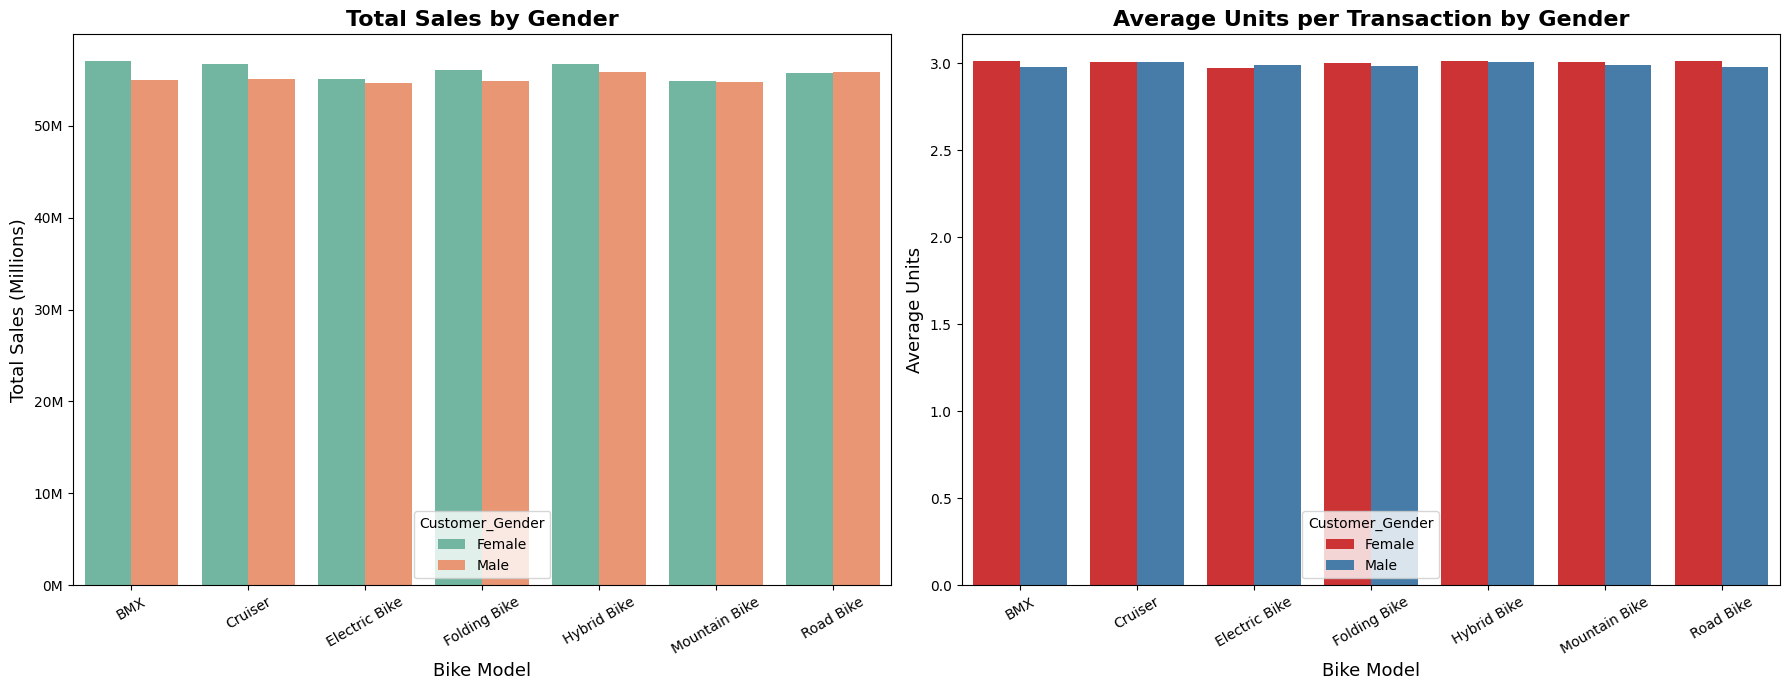

In [ ]:
# Group sales by gender and model (total revenue)
gender_sales = df.groupby(["Bike_Model", "Customer_Gender"])["TotalPrice"].sum().reset_index()

gender_units = df.groupby(["Bike_Model", "Customer_Gender"])["Quantity"].mean().reset_index()
display(
    gender_units.pivot(index="Bike_Model", columns="Customer_Gender", values="Quantity")
    .style.format("{:.2f}")
    .background_gradient(cmap="coolwarm", axis=None)
)
fig, axes = plt.subplots(1, 2, figsize=(18,7))

sns.barplot(data=gender_sales, x="Bike_Model", y="TotalPrice", hue="Customer_Gender", ax=axes[0], palette="Set2")
axes[0].set_title("Total Sales by Gender", fontsize=16, fontweight="bold")
axes[0].yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x/1e6:.0f}M'))
axes[0].set_xlabel("Bike Model", fontsize=13)
axes[0].set_ylabel("Total Sales (Millions)", fontsize=13)
axes[0].tick_params(axis='x', rotation=30)


sns.barplot(data=gender_units, x="Bike_Model", y="Quantity", hue="Customer_Gender", ax=axes[1], palette="Set1")
axes[1].set_title("Average Units per Transaction by Gender", fontsize=16, fontweight="bold")
axes[1].set_xlabel("Bike Model", fontsize=13)
axes[1].set_ylabel("Average Units", fontsize=13)
axes[1].tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.show()

در ظاهر مجموع فروش میان زنان و مردان تفاوت چشمگیری ندارد و تقریباً برابر است  
اما وقتی به میانگین تعداد خرید در هر سفارش نگاه کنیم تصویر تازه‌ای نمایان می‌شود  

زنان بیشتر تمایل دارند خرید خود را در تعداد کمتر اما با مدل‌هایی خاص مثل بی ام ایکس و دوچرخه‌های تاشو انجام دهند  
در مقابل مردان معمولاً در هر بار سفارش تعداد بیشتری واحد می‌خرند به‌ویژه در مدل‌های جاده‌ای و هیبریدی  

این تفاوت رفتاری نشان می‌دهد که استراتژی بازاریابی می‌تواند متفاوت باشد  
برای زنان تأکید روی تجربه فردی و ویژگی‌های سبک زندگی  
و برای مردان تأکید روی ارزش اقتصادی بسته‌های چندتایی یا تخفیف خرید عمده می‌تواند موثرتر باشد  

,Store_Location,TotalPrice
3,New York,"113,592,474"
5,Phoenix,"111,860,420"
4,Philadelphia,"111,765,829"
1,Houston,"110,427,042"
0,Chicago,"110,388,139"
2,Los Angeles,"110,340,851"
6,San Antonio,"110,059,479"


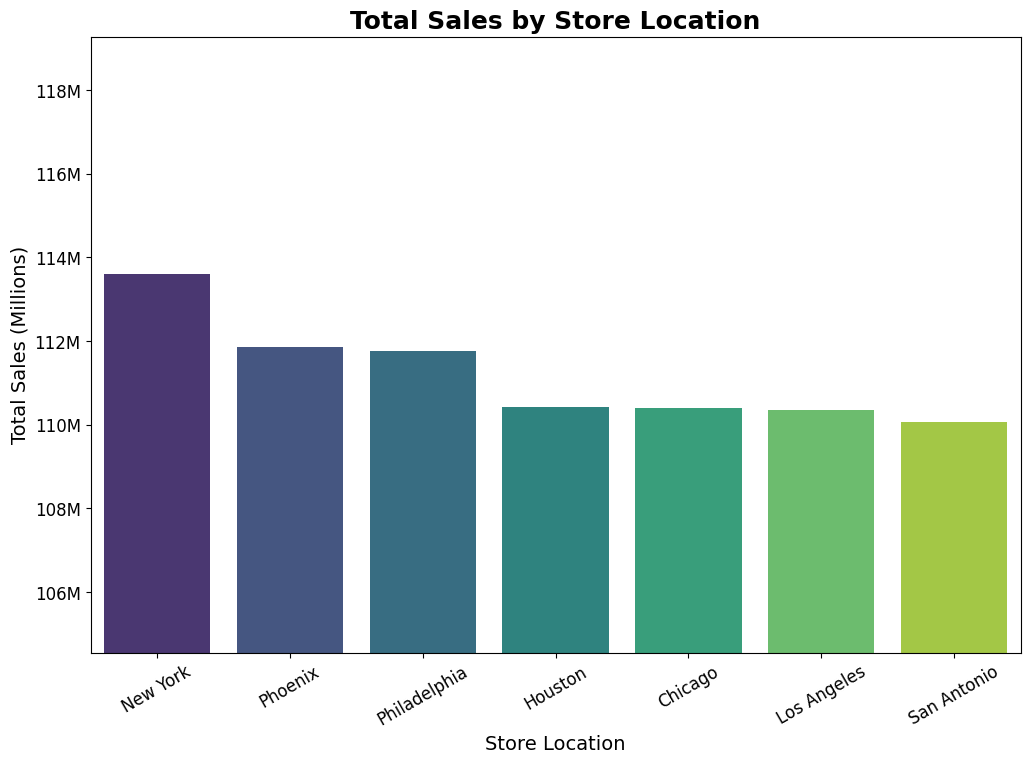

In [ ]:

# Table
display(location_sales.style.format({"TotalPrice": "{:,.0f}"}).background_gradient(cmap="Greens"))

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

# Group sales by store
location_sales = df.groupby("Store_Location")["TotalPrice"].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12,8))
sns.barplot(data=location_sales, x="Store_Location", y="TotalPrice", hue="Store_Location", palette="viridis", legend=False)

plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x/1e6)}M'))
plt.ylim(location_sales["TotalPrice"].min()*0.95, location_sales["TotalPrice"].max()*1.05)
plt.title("Total Sales by Store Location", fontsize=18, fontweight="bold")
plt.xlabel("Store Location", fontsize=14)
plt.ylabel("Total Sales (Millions)", fontsize=14)
plt.xticks(rotation=30, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

فروشگاه‌های مختلف تقریباً در یک سطح قرار دارند و هیچ شهری فاصله چشمگیری با بقیه ندارد  
نیویورک کمی بالاتر از بقیه است و سن آنتونیو کمی پایین‌تر اما اختلاف آنقدر بزرگ نیست که نشان‌دهنده تفاوت جدی باشد  

این توازن نشان می‌دهد که تقاضا برای دوچرخه‌ها در شهرهای مختلف تقریباً مشابه است  

,TotalPrice
Store_Location,
New York,"7,826"
Phoenix,"7,776"
Philadelphia,"7,799"
Houston,"7,805"
Chicago,"7,770"
Los Angeles,"7,818"
San Antonio,"7,696"


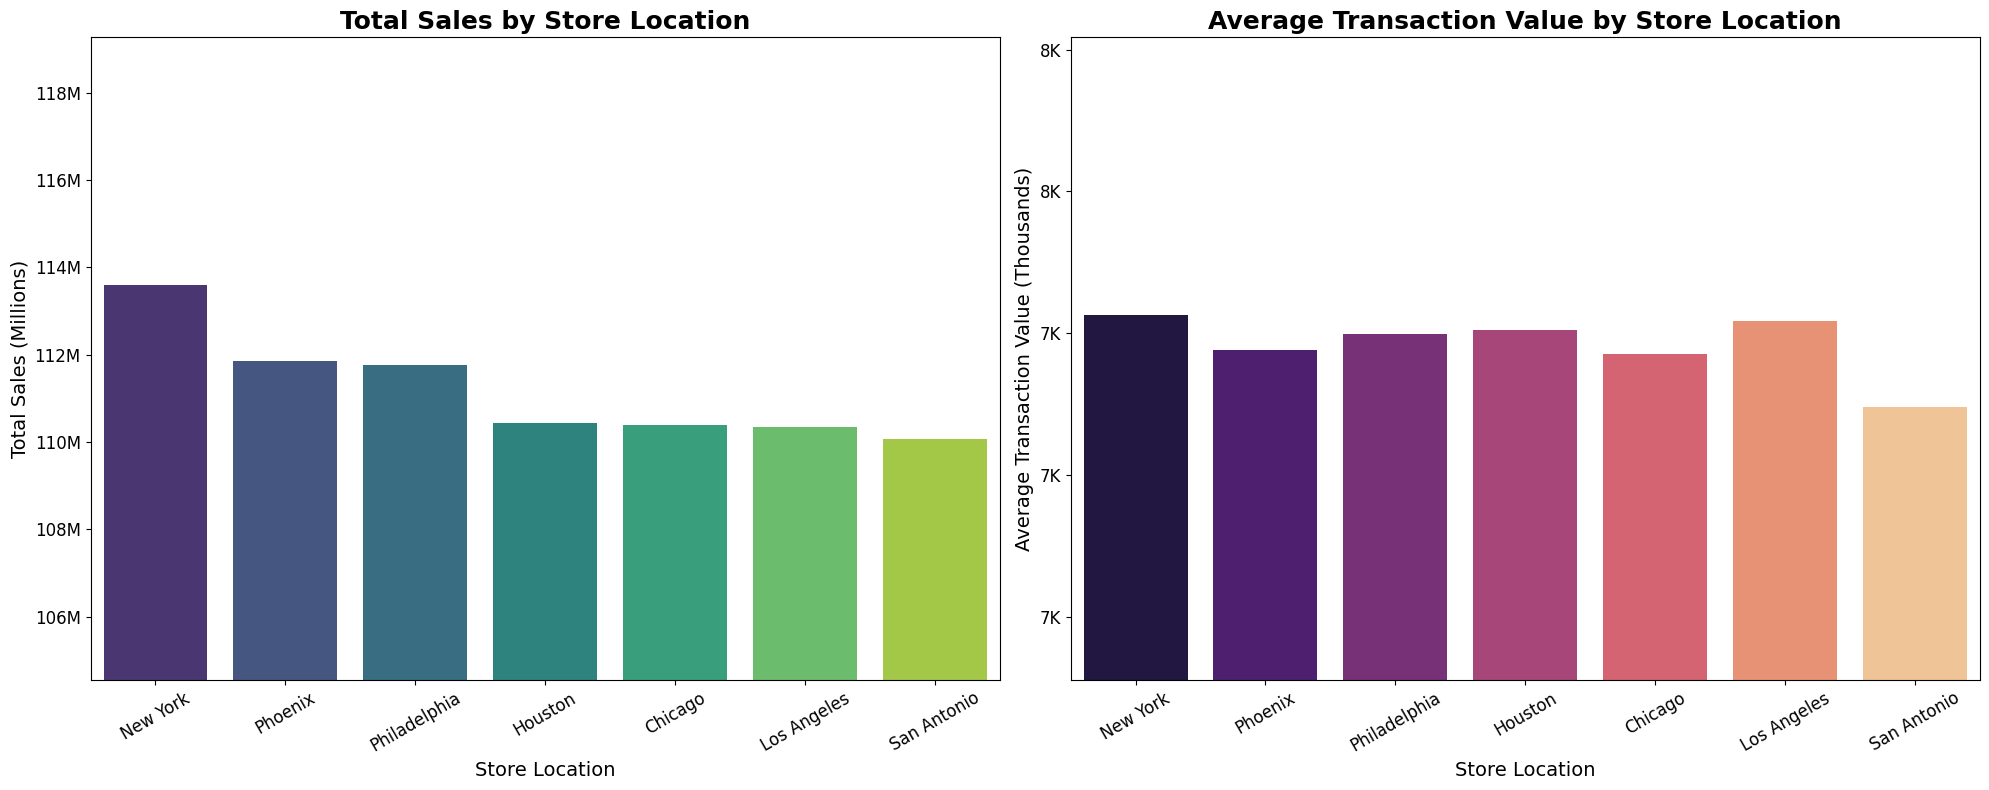

In [ ]:
# Total sales by location (sorted)
location_sales = df.groupby("Store_Location")["TotalPrice"].sum().sort_values(ascending=False).reset_index()

location_avg = df.groupby("Store_Location")["TotalPrice"].mean().reset_index()
location_avg["Store_Location"] = pd.Categorical(location_avg["Store_Location"], categories=location_sales["Store_Location"], ordered=True)
location_avg = location_avg.sort_values("Store_Location")
display(
    location_avg.set_index("Store_Location")
    .style.format("{:,.0f}")
    .background_gradient(cmap="YlGnBu", axis=None)
)

fig, axes = plt.subplots(1, 2, figsize=(20,8))

# Plot 1: Total Sales by Store Location
sns.barplot(
    data=location_sales,
    x="Store_Location", y="TotalPrice",
    hue="Store_Location", palette="viridis", legend=False, ax=axes[0]
)
axes[0].yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x/1e6)}M'))
axes[0].set_ylim(location_sales["TotalPrice"].min()*0.95, location_sales["TotalPrice"].max()*1.05)
axes[0].set_title("Total Sales by Store Location", fontsize=18, fontweight="bold")
axes[0].set_xlabel("Store Location", fontsize=14)
axes[0].set_ylabel("Total Sales (Millions)", fontsize=14)
axes[0].tick_params(axis='x', rotation=30, labelsize=12)
axes[0].tick_params(axis='y', labelsize=12)

# Plot 2: Average Transaction Value by Store Location
sns.barplot(
    data=location_avg,
    x="Store_Location", y="TotalPrice",
    hue="Store_Location", palette="magma", legend=False, ax=axes[1]
)
axes[1].yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x/1e3)}K'))
axes[1].set_ylim(location_avg["TotalPrice"].min()*0.95, location_avg["TotalPrice"].max()*1.05)
axes[1].set_title("Average Transaction Value by Store Location", fontsize=18, fontweight="bold")
axes[1].set_xlabel("Store Location", fontsize=14)
axes[1].set_ylabel("Average Transaction Value (Thousands)", fontsize=14)
axes[1].tick_params(axis='x', rotation=30, labelsize=12)
axes[1].tick_params(axis='y', labelsize=12)

plt.tight_layout()
plt.show()

فروش کل میان فروشگاه‌ها تقریباً متوازن است و همه در یک محدوده نزدیک قرار دارند
اما وقتی میانگین ارزش هر تراکنش را بررسی می‌کنیم تفاوت‌های رفتاری مشخص می‌شود

در برخی فروشگاه‌ها مشتریان خریدهای کوچک‌تر ولی متعدد انجام می‌دهند
در حالی که در برخی دیگر تراکنش‌ها کمتر ولی با ارزش بالاتر صورت می‌گیرد
این تفاوت نشان می‌دهد که الگوی مصرف در شهرهای مختلف یکسان نیست و نیازمند رویکردهای بازاریابی متفاوت است

در شهرهایی با خریدهای کم تمرکز بر حجم بالا و تخفیف‌های کوچک مؤثرتر است
در مقابل در شهرهایی با خریدهای پرارزش ایجاد تجربه ممتاز و خدمات ویژه می‌تواند بهترین نتیجه را بدهد


Age_Group,<25,25-40,40-60,60+
Bike_Model,,,,
BMX,"14,747,316","31,522,868","42,329,565","23,546,366"
Cruiser,"14,863,263","31,638,109","41,284,496","24,063,224"
Electric Bike,"14,902,008","30,913,296","41,520,281","22,414,576"
Folding Bike,"13,761,648","32,591,894","42,263,726","22,349,550"
Hybrid Bike,"14,415,130","31,620,189","42,860,602","23,609,589"
Mountain Bike,"14,794,911","30,937,612","40,635,106","23,269,338"
Road Bike,"14,808,076","31,050,617","42,887,824","22,833,057"


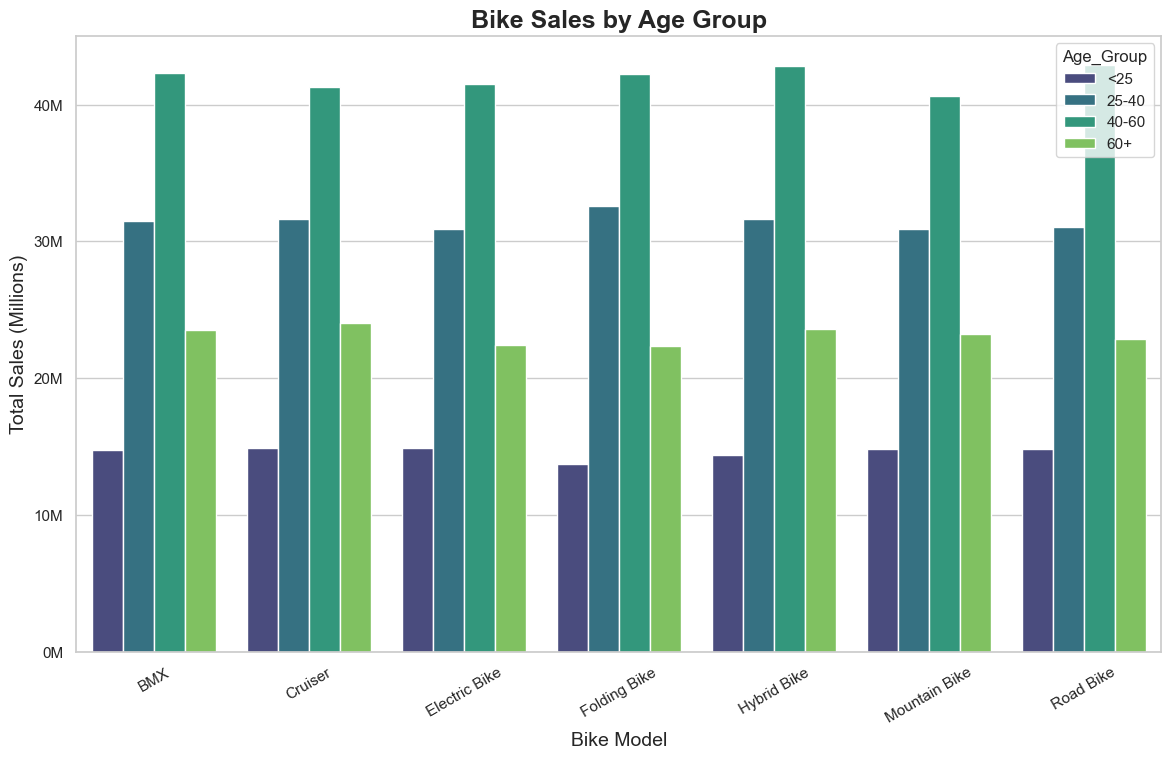

In [ ]:
# 1. Which bike model is most popular among different age groups?
age_group_sales = df.groupby(["Bike_Model", "Age_Group"], observed=False)["TotalPrice"].sum().reset_index()

# Table 
display(
    age_group_sales.pivot(index="Bike_Model", columns="Age_Group", values="TotalPrice")
    .style.format("{:,.0f}")
    .background_gradient(cmap="Blues", axis=None)
)
# Plot
plt.figure(figsize=(14,8))
sns.barplot(data=age_group_sales, x="Bike_Model", y="TotalPrice", hue="Age_Group", palette="viridis")
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x/1e6:.0f}M'))
plt.title("Bike Sales by Age Group", fontsize=18, fontweight="bold")
plt.xlabel("Bike Model", fontsize=14)
plt.ylabel("Total Sales (Millions)", fontsize=14)
plt.xticks(rotation=30)
plt.show()


بیشترین خریداران در گروه میانسال یعنی چهل تا شصت سال هستند  
بعد از آن جوانان بیست و پنج تا چهل سال بیشترین سهم را دارند  
افراد زیر بیست و پنج سال سهم کمتری دارند و سالمندان بالای شصت سال هم حضور قابل توجه اما کوچکتری دارند  

میان مدل‌ها هم تفاوت‌هایی دیده می‌شود  
دوچرخه‌های تاشو میان جوان‌ترها محبوب‌ترند که احتمالاً به دلیل نیاز به رفت‌وآمد شهری است  
دوچرخه‌های برقی هم بیشتر در میان جوانان دیده می‌شوند که نشان‌دهنده علاقه آن‌ها به فناوری است  
در عوض دوچرخه‌های کوهستانی و تفریحی برای افراد مسن‌تر جذاب‌تر به نظر می‌رسند  

از نظر بازاریابی این یعنی برای مدل‌های تاشو و برقی می‌توان پیام‌هایی با محوریت راحتی و تکنولوژی طراحی کرد  
برای میانسالان باید روی کیفیت و دوام تأکید شود و برای سالمندان پیام‌هایی با محوریت تفریح و سلامتی مناسب‌تر است  


,TotalPrice
Age_Group,
<25,"7,742"
25-40,"7,789"
40-60,"7,811"
60+,"7,758"


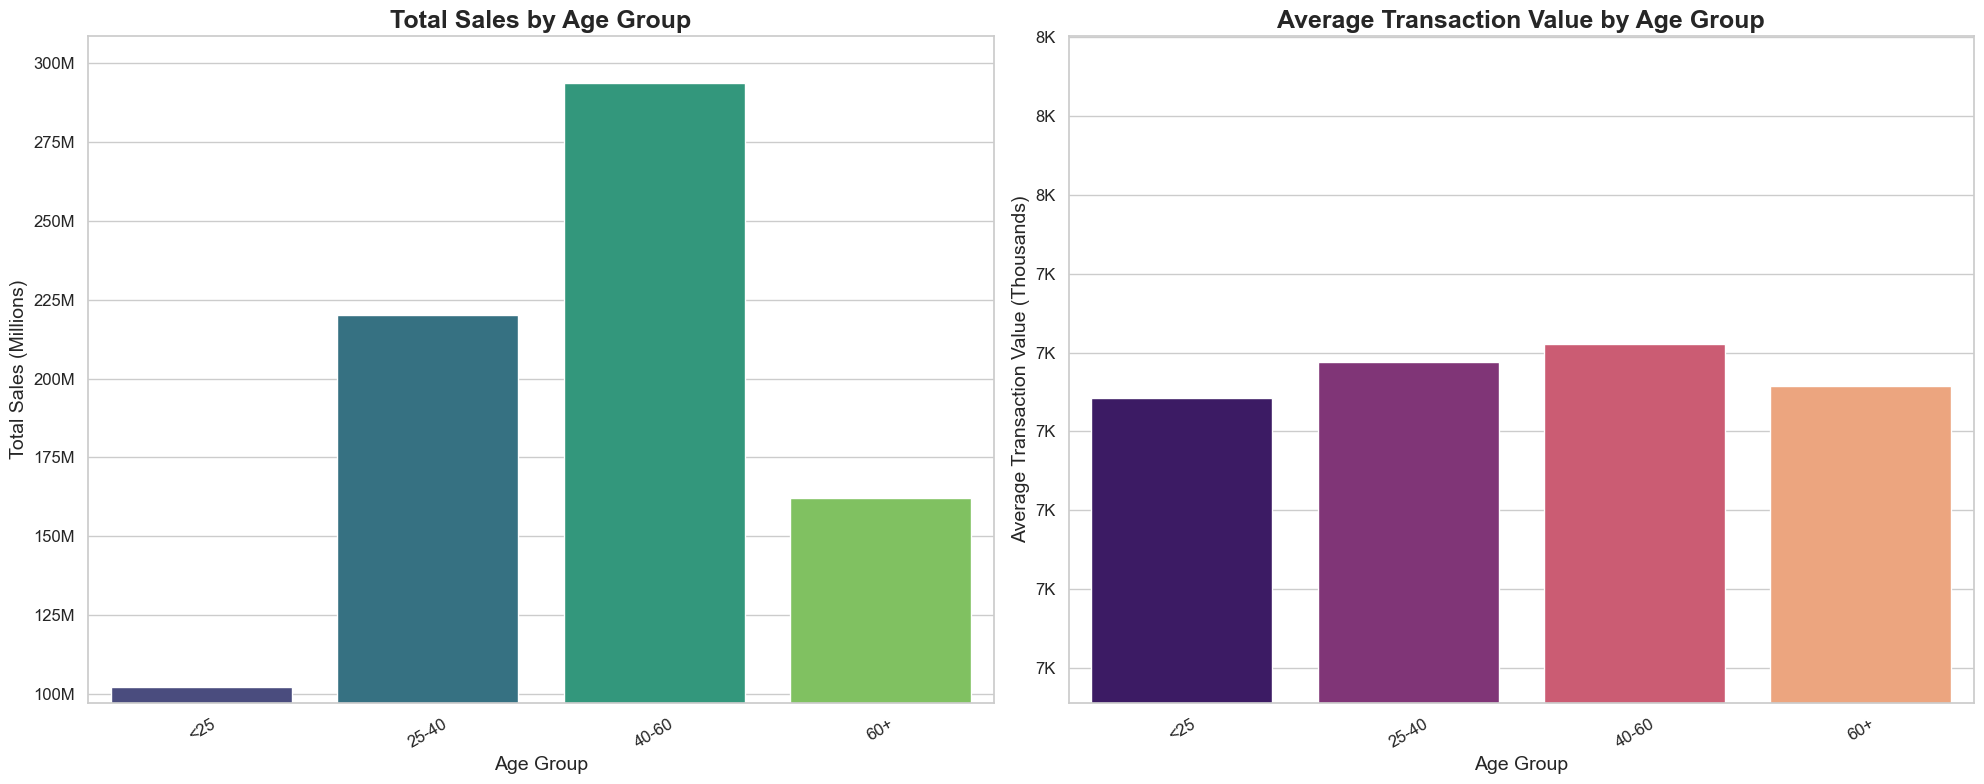

In [ ]:
# Total sales by age group
age_sales = df.groupby("Age_Group", observed=False)["TotalPrice"].sum().reset_index().sort_values("TotalPrice", ascending=False)

# Average transaction value by age group
age_avg = df.groupby("Age_Group", observed=False)["TotalPrice"].mean().reset_index()
age_avg["Age_Group"] = pd.Categorical(age_avg["Age_Group"], categories=age_sales["Age_Group"], ordered=True)
age_avg = age_avg.sort_values("Age_Group")

# Table: Average transaction value by age group
display(
    age_avg.set_index("Age_Group")
    .style.format("{:,.0f}")
    .background_gradient(cmap="OrRd", axis=None)
)

fig, axes = plt.subplots(1, 2, figsize=(20,8))

# Plot 1: Total Sales by Age Group
sns.barplot(
    data=age_sales,
    x="Age_Group", y="TotalPrice",
    hue="Age_Group", palette="viridis", legend=False, ax=axes[0]
)
axes[0].yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x/1e6)}M'))
axes[0].set_ylim(age_sales["TotalPrice"].min()*0.95, age_sales["TotalPrice"].max()*1.05)
axes[0].set_title("Total Sales by Age Group", fontsize=18, fontweight="bold")
axes[0].set_xlabel("Age Group", fontsize=14)
axes[0].set_ylabel("Total Sales (Millions)", fontsize=14)
axes[0].tick_params(axis='x', rotation=30, labelsize=12)
axes[0].tick_params(axis='y', labelsize=12)

# Plot 2: Average Transaction Value by Age Group
sns.barplot(
    data=age_avg,
    x="Age_Group", y="TotalPrice",
    hue="Age_Group", palette="magma", legend=False, ax=axes[1]
)
axes[1].yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x/1e3)}K'))
axes[1].set_ylim(age_avg["TotalPrice"].min()*0.95, age_avg["TotalPrice"].max()*1.05)
axes[1].set_title("Average Transaction Value by Age Group", fontsize=18, fontweight="bold")
axes[1].set_xlabel("Age Group", fontsize=14)
axes[1].set_ylabel("Average Transaction Value (Thousands)", fontsize=14)
axes[1].tick_params(axis='x', rotation=30, labelsize=12)
axes[1].tick_params(axis='y', labelsize=12)

plt.tight_layout()
plt.show()


In [ ]:
میان گروه‌های سنی بیشترین سهم فروش مربوط به میانسالان است
اما بررسی میانگین ارزش هر تراکنش تصویر متفاوتی نشان می‌دهد

افراد جوان معمولاً خریدهایی با مبلغ کمتر اما تعداد بیشتر انجام می‌دهند
در حالی که افراد مسن‌تر تراکنش‌های کمتری دارند اما هر بار مبلغ بالاتری خرج می‌کنند
این موضوع بازتابی از تفاوت‌های قدرت خرید و الگوی مصرف در سنین مختلف است

برای جذب گروه جوان پیشنهاد می‌شود بر تخفیف‌ها و گزینه‌های اقساطی تمرکز شود
و برای گروه‌های مسن‌تر تأکید بر کیفیت بالاتر و خدمات ممتاز می‌تواند مؤثرتر باشد

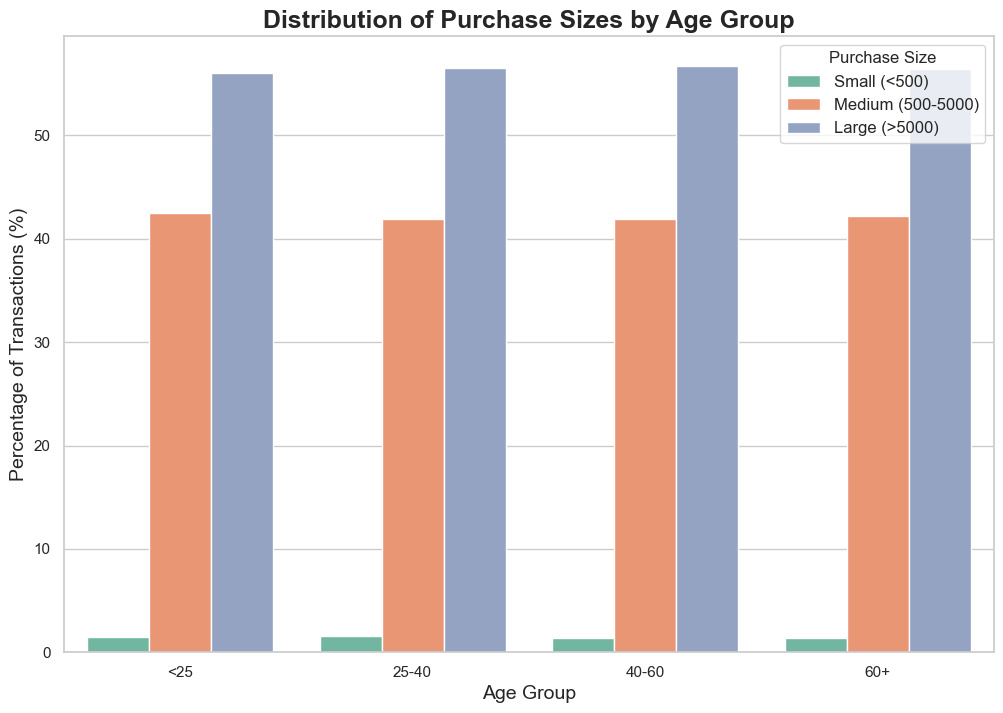

اگر فقط به فروش کل نگاه کنیم ممکن است تصور شود همه گروه‌های سنی تقریباً رفتار مشابهی دارند اما بررسی اندازه خریدها تصویر دقیق‌تری ارائه می‌دهد  
جوان‌ترها معمولاً خریدهای کوچک‌تری انجام می‌دهند و بیشتر در بازه تراکنش‌های کم‌ارزش قرار دارند  
این موضوع می‌تواند به دلیل قدرت خرید پایین‌تر یا نیاز به تست و تجربه بیشتر باشد  
در مقابل گروه میانسال به ویژه بین چهل تا شصت سال بیشترین سهم از خریدهای بزرگ را دارد  
این نشان می‌دهد در این سن افراد تمایل دارند کمتر خرید کنند اما وقتی خریدی انجام می‌دهند ارزش بالاتری دارد  
گروه بالای شصت سال ترکیبی از این دو رفتار را نشان می‌دهد یعنی تعداد خریدها کمتر است اما همچنان بخشی از آنها خریدهای با ارزش بالاست  
این تحلیل نشان می‌دهد استراتژی‌های بازاریابی باید بر اساس اندازه خرید در گروه‌های سنی متفاوت طراحی شود نه فقط بر اساس مجموع فروش


In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns


bins = [0, 500, 5000, df["TotalPrice"].max()]
labels = ["Small (<500)", "Medium (500-5000)", "Large (>5000)"]

df["Purchase_Size"] = pd.cut(df["TotalPrice"], bins=bins, labels=labels, include_lowest=True)


age_purchase_dist = (
    df.groupby(["Age_Group", "Purchase_Size"], observed=False)
    .size()
    .reset_index(name="Count")
)


age_purchase_dist["Percentage"] = age_purchase_dist.groupby("Age_Group", observed=False)["Count"].transform(
    lambda x: x / x.sum() * 100
)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(
    data=age_purchase_dist,
    x="Age_Group",
    y="Percentage",
    hue="Purchase_Size",
    palette="Set2"
)

plt.title("Distribution of Purchase Sizes by Age Group", fontsize=18, fontweight="bold")
plt.xlabel("Age Group", fontsize=14)
plt.ylabel("Percentage of Transactions (%)", fontsize=14)
plt.legend(title="Purchase Size", fontsize=12, title_fontsize=12)
plt.show()

print(
"اگر فقط به فروش کل نگاه کنیم ممکن است تصور شود همه گروه‌های سنی تقریباً رفتار مشابهی دارند اما بررسی اندازه خریدها تصویر دقیق‌تری ارائه می‌دهد  \n"
"جوان‌ترها معمولاً خریدهای کوچک‌تری انجام می‌دهند و بیشتر در بازه تراکنش‌های کم‌ارزش قرار دارند  \n"
"این موضوع می‌تواند به دلیل قدرت خرید پایین‌تر یا نیاز به تست و تجربه بیشتر باشد  \n"
"در مقابل گروه میانسال به ویژه بین چهل تا شصت سال بیشترین سهم از خریدهای بزرگ را دارد  \n"
"این نشان می‌دهد در این سن افراد تمایل دارند کمتر خرید کنند اما وقتی خریدی انجام می‌دهند ارزش بالاتری دارد  \n"
"گروه بالای شصت سال ترکیبی از این دو رفتار را نشان می‌دهد یعنی تعداد خریدها کمتر است اما همچنان بخشی از آنها خریدهای با ارزش بالاست  \n"
"این تحلیل نشان می‌دهد استراتژی‌های بازاریابی باید بر اساس اندازه خرید در گروه‌های سنی متفاوت طراحی شود نه فقط بر اساس مجموع فروش"
)


,Customer_ID,TotalPrice
1490,2490,"265,308"
781,1781,"236,006"
8835,9835,"226,438"
1111,2111,"225,949"
5568,6568,"225,651"
8807,9807,"224,528"
3983,4983,"223,930"
6186,7186,"222,267"
1206,2206,"218,741"
3660,4660,"209,181"


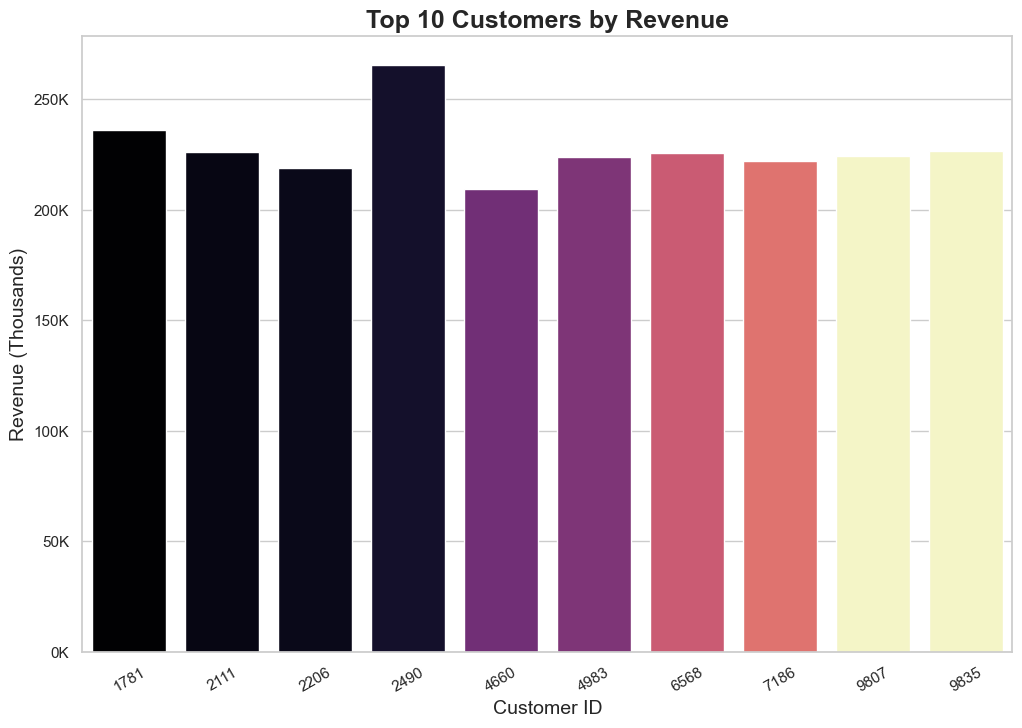

In [ ]:

top_customers = (
    df.groupby("Customer_ID")["TotalPrice"]
    .sum()
    .reset_index()
    .sort_values("TotalPrice", ascending=False)
    .head(10)
)

# Table
display(
    top_customers.style.format({"TotalPrice": "{:,.0f}"}).background_gradient(cmap="Oranges")
)

# Plot
plt.figure(figsize=(12,8))
sns.barplot(
    data=top_customers,
    x="Customer_ID",
    y="TotalPrice",
    hue="Customer_ID",       
    palette="magma",
    legend=False             
)
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x/1e3:.0f}K'))
plt.title("Top 10 Customers by Revenue", fontsize=18, fontweight="bold")
plt.xlabel("Customer ID", fontsize=14)
plt.ylabel("Revenue (Thousands)", fontsize=14)
plt.xticks(rotation=30)
plt.show()


ده مشتری برتر در کل تنها بخش کوچکی از درآمد را تشکیل می‌دهند  
هر کدام از آن‌ها مبالغ بالایی خرج کرده‌اند اما در مقیاس کل سهمشان بسیار کم است  

این یعنی درآمد شرکت به طور گسترده بین هزاران مشتری تقسیم شده و وابسته به تعداد کمی خریدار بزرگ نیست  
از دید مدیریت ریسک این وضعیت بسیار سالم است چون اتکا به چند مشتری محدود وجود ندارد  

از دید بازاریابی هم فرصت زیادی برای رشد در میان مشتریان عادی وجود دارد  
تمرکز روی افزایش تعداد خرید و افزایش میانگین مبلغ خرید مشتریان متوسط می‌تواند سود زیادی ایجاد کند  
بهتر است بررسی شود آیا مشتریان برتر به خاطر خریدهای مکرر ارزشمند شده‌اند یا به خاطر چند خرید بزرگ  
بر اساس این الگو می‌توان استراتژی‌های وفاداری مناسب طراحی کرد  


Bike_Model,BMX,Cruiser,Electric Bike,Folding Bike,Hybrid Bike,Mountain Bike,Road Bike,Total
Store_Location,,,,,,,,
New York,"16,397,473","16,532,229","15,585,675","15,774,121","16,663,923","16,426,884","16,212,169","113,592,474"
Phoenix,"15,804,555","16,558,341","15,114,324","16,217,235","16,250,735","15,380,346","16,534,883","111,860,420"
Philadelphia,"16,358,114","15,760,755","15,905,105","15,929,900","15,506,672","15,766,814","16,538,470","111,765,829"
Houston,"15,682,595","15,604,005","15,936,072","16,084,040","16,536,842","14,719,954","15,863,535","110,427,042"
Chicago,"15,759,838","15,395,694","16,355,493","14,980,284","16,268,229","15,914,739","15,713,861","110,388,139"
Los Angeles,"16,241,146","16,216,056","15,592,668","15,825,319","15,333,939","16,115,709","15,016,015","110,340,851"
San Antonio,"15,902,393","15,782,012","15,260,823","16,155,920","15,945,170","15,312,521","15,700,640","110,059,479"
Total,"112,146,114","111,849,092","109,750,159","110,966,818","112,505,511","109,636,967","111,579,574","778,434,235"


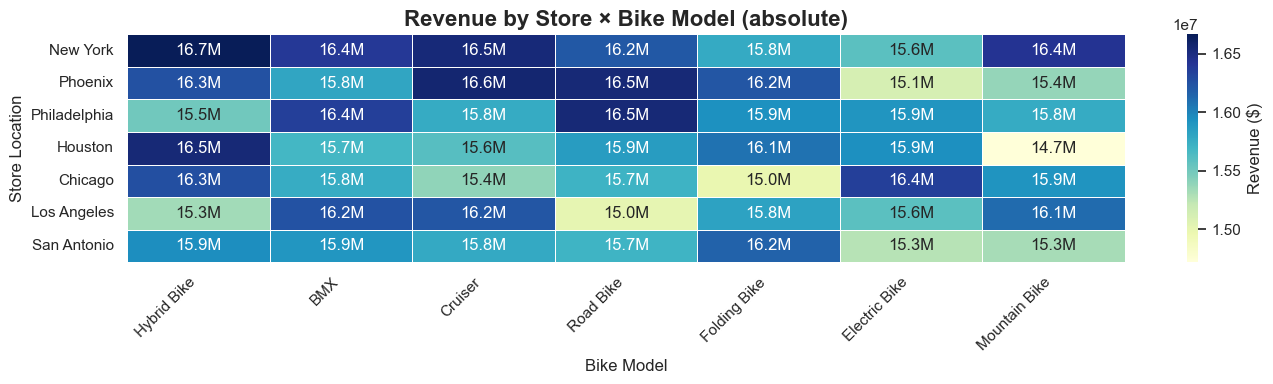

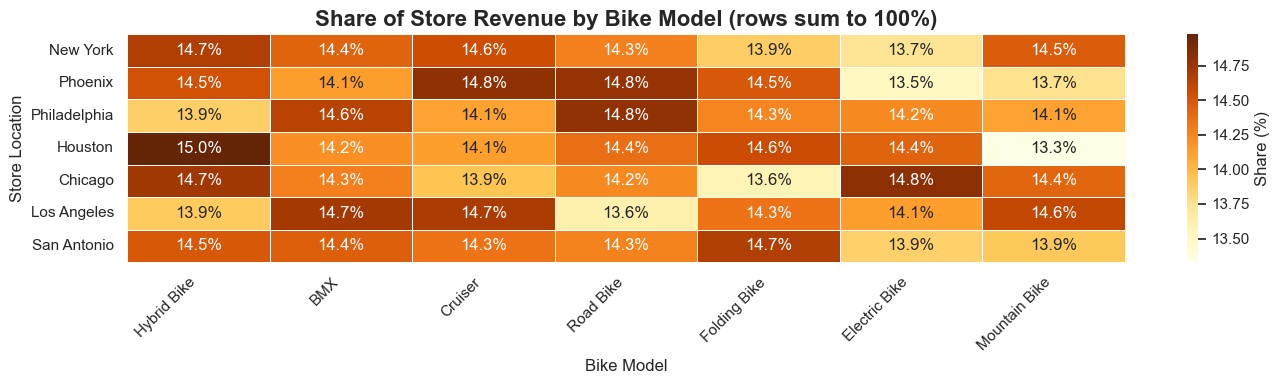

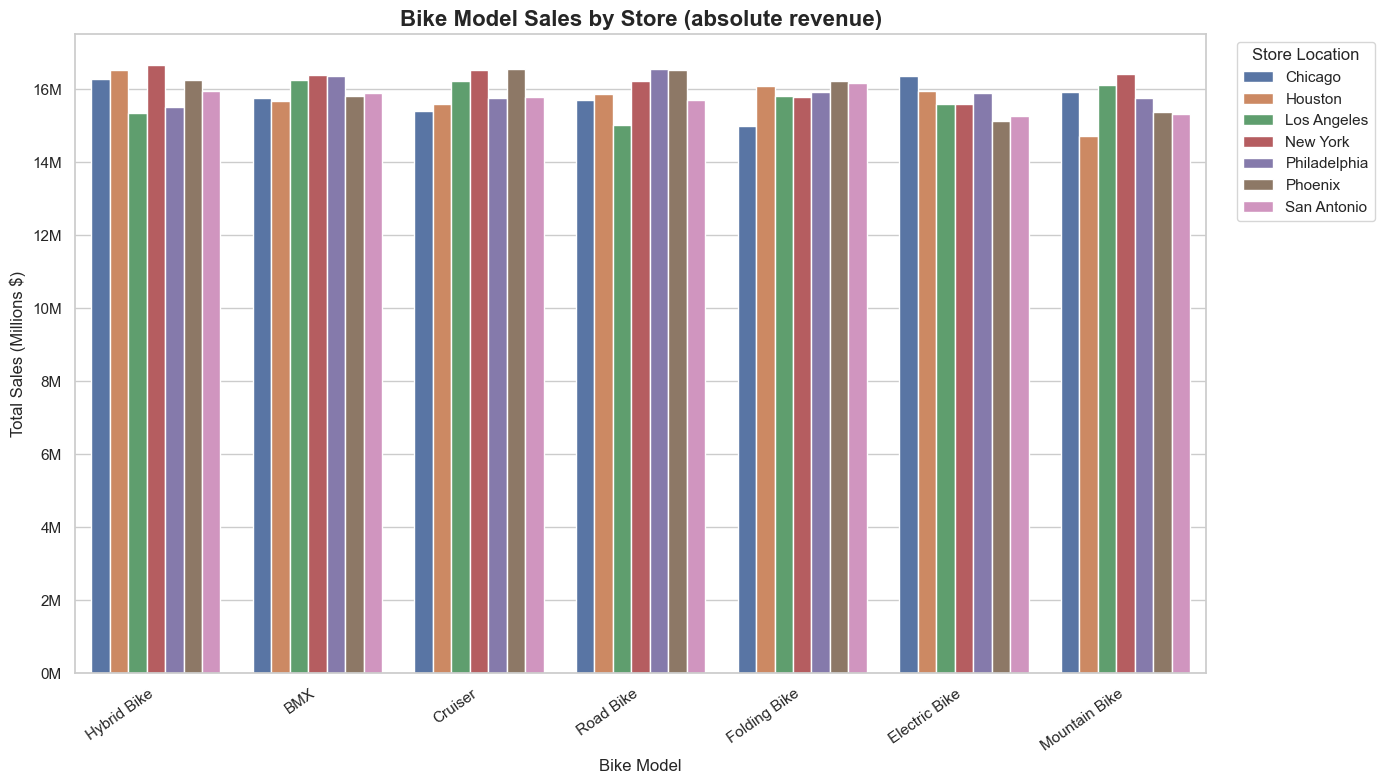

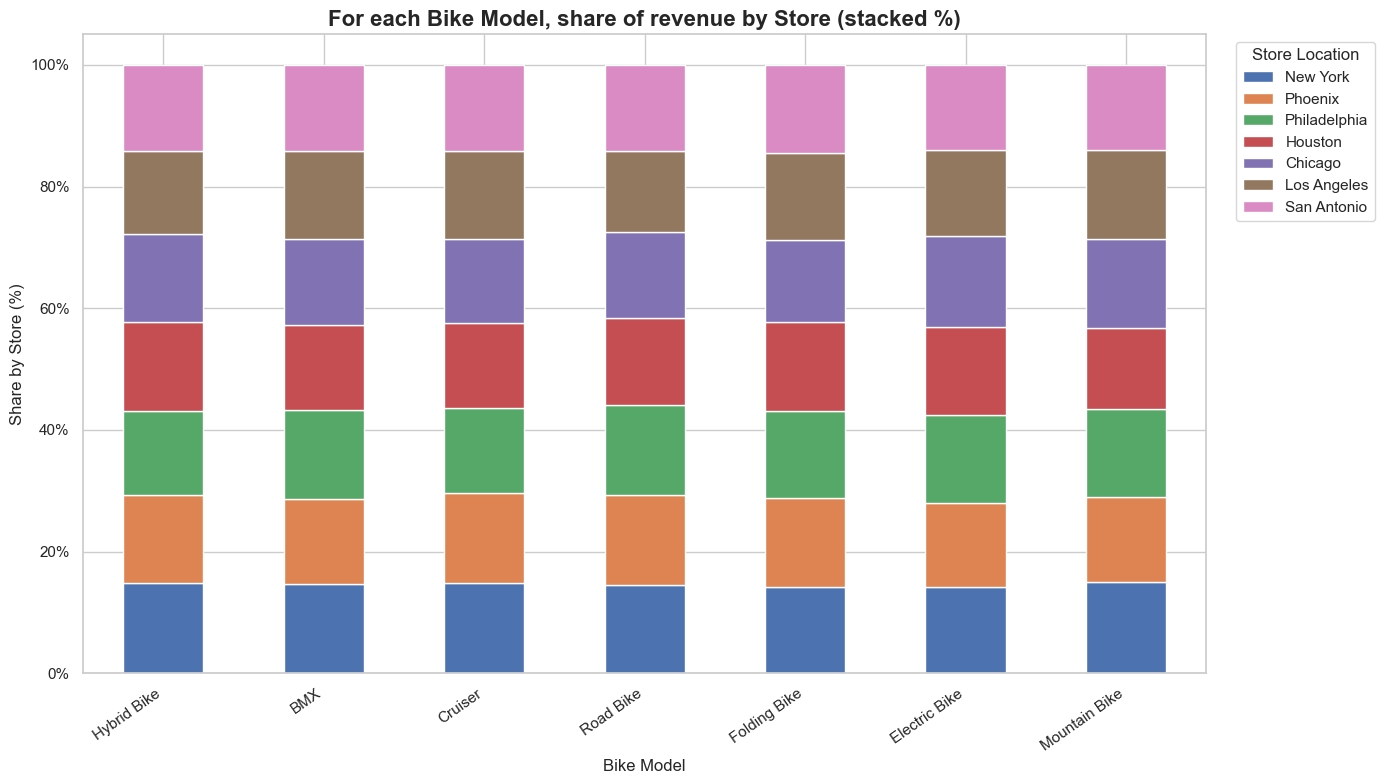

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
from IPython.display import display

sns.set(style="whitegrid")
top_n = None   


expected = {"Store_Location", "Bike_Model", "TotalPrice"}
missing = expected - set(df.columns)
if missing:
    raise KeyError(f"Missing expected columns in df: {missing}. Available columns: {list(df.columns)}")

store_model_sales = (
    df.groupby(["Store_Location", "Bike_Model"], observed=False)["TotalPrice"]
    .sum()
    .reset_index()
)

if top_n is not None:
    top_models = (
        df.groupby("Bike_Model")["TotalPrice"].sum()
        .nlargest(top_n)
        .index
        .tolist()
    )
    store_model_sales = store_model_sales[store_model_sales["Bike_Model"].isin(top_models)]


pivot = (
    store_model_sales
    .pivot(index="Store_Location", columns="Bike_Model", values="TotalPrice")
    .fillna(0)
)

display_df = pivot.copy()
display_df["Total"] = display_df.sum(axis=1)
display_df = display_df.sort_values("Total", ascending=False)

col_totals = display_df.sum(axis=0)
display_df.loc["Total"] = col_totals

display(
    display_df
    .style.format("{:,.0f}")
    .background_gradient(cmap="YlGnBu", axis=None)
)

heatmap_data = display_df.drop(index="Total").drop(columns="Total")

col_order = heatmap_data.sum(axis=0).sort_values(ascending=False).index.tolist()
heatmap_data = heatmap_data[col_order]

annot_m = heatmap_data.div(1e6).round(1).astype(str) + "M"   
plt.figure(figsize=(14, max(4, 0.35 * heatmap_data.shape[0])))
sns.heatmap(
    heatmap_data,
    cmap="YlGnBu",
    annot=annot_m,
    fmt="",
    linewidths=0.5,
    cbar_kws={"label": "Revenue ($)"}
)
plt.title("Revenue by Store × Bike Model (absolute)", fontsize=16, fontweight="bold")
plt.xlabel("Bike Model")
plt.ylabel("Store Location")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


heatmap_pct_by_store = heatmap_data.div(heatmap_data.sum(axis=1), axis=0) * 100
annot_pct = heatmap_pct_by_store.round(1).astype(str) + "%"
plt.figure(figsize=(14, max(4, 0.35 * heatmap_pct_by_store.shape[0])))
sns.heatmap(
    heatmap_pct_by_store,
    cmap="YlOrBr",
    annot=annot_pct,
    fmt="",
    linewidths=0.5,
    cbar_kws={"label": "Share (%)"}
)
plt.title("Share of Store Revenue by Bike Model (rows sum to 100%)", fontsize=16, fontweight="bold")
plt.xlabel("Bike Model")
plt.ylabel("Store Location")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


plt.figure(figsize=(14,8))
sns.barplot(
    data=store_model_sales,
    x="Bike_Model", y="TotalPrice", hue="Store_Location",
    order=col_order,
    estimator=sum,
    dodge=True
)
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x/1e6:.0f}M'))
plt.title("Bike Model Sales by Store (absolute revenue)", fontsize=16, fontweight="bold")
plt.xlabel("Bike Model")
plt.ylabel("Total Sales (Millions $)")
plt.xticks(rotation=35, ha="right")
plt.legend(title="Store Location", bbox_to_anchor=(1.02,1), loc="upper left")
plt.tight_layout()
plt.show()

df_for_stacked = heatmap_data.T
df_for_stacked_pct = df_for_stacked.div(df_for_stacked.sum(axis=1), axis=0) * 100

ax = df_for_stacked_pct.plot(kind="bar", stacked=True, figsize=(14,8))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=100))
plt.title("For each Bike Model, share of revenue by Store (stacked %)", fontsize=16, fontweight="bold")
plt.xlabel("Bike Model")
plt.ylabel("Share by Store (%)")
plt.xticks(rotation=35, ha="right")
plt.legend(title="Store Location", bbox_to_anchor=(1.02,1), loc="upper left")
plt.tight_layout()
plt.show()


وقتی به جدول اصلی نگاه میکنیم میبینیم که میزان فروش میان همه فروشگاهها تقریباً برابر است و اختلاف بزرگی وجود ندارد اما فروشگاه نیویورک بیشترین فروش را دارد و فروشگاه سن آنتونیو کمترین فروش را ثبت کرده

در نقشه حرارتی مطلق این تفاوتها با شدت رنگ بهتر دیده میشود برای نمونه در مدلهای بی ام ایکس و کروزر و جاده ای فروشگاه نیویورک عملکرد بالاتری نسبت به دیگر شهرها داشته در حالی که شهرهایی مانند لس آنجلس و سن آنتونیو معمولاً در رده های پایین تر قرار میگیرند

وقتی همه چیز را به سهم درصدی تبدیل میکنیم تصویر متفاوتی به دست میآید در این حالت مشخص میشود که تقریباً در همه فروشگاهها سهم هر مدل دوچرخه به هم نزدیک است و هیچ مدلی به طور کامل بر دیگری برتری ندارد این موضوع نشان میدهد که تعادل در داده ها به شکل طراحی شده ایجاد شده و همه مدلها در تمام شهرها سهمی تقریباً مشابه دارند

نمودار میله ای هم همین نکته را تایید میکند میله های مربوط به هر مدل در شهرهای مختلف تقریباً هم اندازه اند این یعنی برخلاف شرایط واقعی که ممکن است در نیویورک دوچرخه های جاده ای بیشتر خریدار داشته باشند یا در لس آنجلس دوچرخه های برقی محبوبتر باشند در این داده ها همه چیز متعادل طراحی شده است

در نهایت نمودار ستونی درصدی نشان میدهد که ترکیب فروش هر مدل بین فروشگاهها تفاوت قابل توجهی ندارد هر فروشگاه سهمی مشابه در فروش همه مدلها دارد و این نکته دوباره مصنوعی بودن تعادل داده ها را تایید میکند

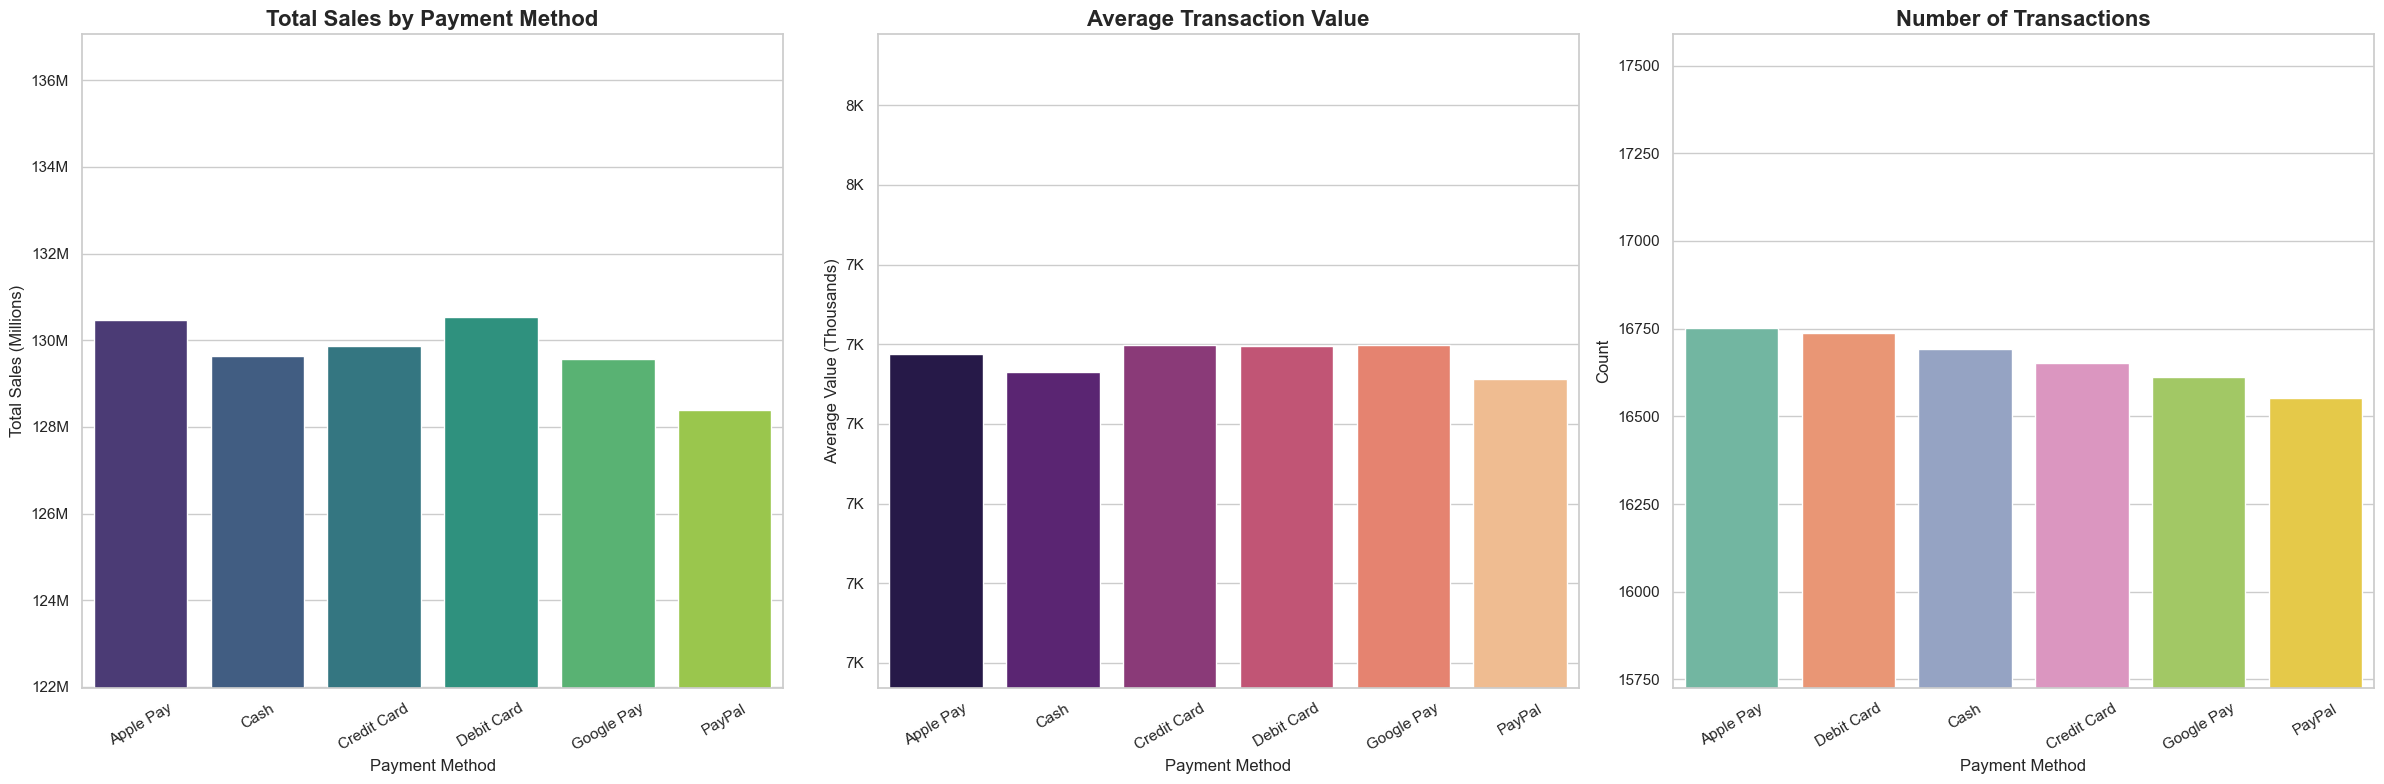

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

payment_sales = df.groupby("Payment_Method")["TotalPrice"].sum().reset_index()
payment_avg = df.groupby("Payment_Method")["TotalPrice"].mean().reset_index()
payment_count = df["Payment_Method"].value_counts().reset_index()
payment_count.columns = ["Payment_Method", "Transaction_Count"]


fig, axes = plt.subplots(1, 3, figsize=(24,8))

sns.barplot(data=payment_sales, x="Payment_Method", y="TotalPrice", hue="Payment_Method", palette="viridis", legend=False, ax=axes[0])
axes[0].yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x/1e6)}M'))
axes[0].set_ylim(payment_sales["TotalPrice"].min()*0.95, payment_sales["TotalPrice"].max()*1.05)
axes[0].set_title("Total Sales by Payment Method", fontsize=16, fontweight="bold")
axes[0].set_xlabel("Payment Method")
axes[0].set_ylabel("Total Sales (Millions)")
axes[0].tick_params(axis="x", rotation=30)

sns.barplot(data=payment_avg, x="Payment_Method", y="TotalPrice", hue="Payment_Method", palette="magma", legend=False, ax=axes[1])
axes[1].yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x/1e3)}K'))
axes[1].set_ylim(payment_avg["TotalPrice"].min()*0.95, payment_avg["TotalPrice"].max()*1.05)
axes[1].set_title("Average Transaction Value", fontsize=16, fontweight="bold")
axes[1].set_xlabel("Payment Method")
axes[1].set_ylabel("Average Value (Thousands)")
axes[1].tick_params(axis="x", rotation=30)


sns.barplot(data=payment_count, x="Payment_Method", y="Transaction_Count", hue="Payment_Method", palette="Set2", legend=False, ax=axes[2])
axes[2].set_ylim(payment_count["Transaction_Count"].min()*0.95, payment_count["Transaction_Count"].max()*1.05)
axes[2].set_title("Number of Transactions", fontsize=16, fontweight="bold")
axes[2].set_xlabel("Payment Method")
axes[2].set_ylabel("Count")
axes[2].tick_params(axis="x", rotation=30)

plt.tight_layout()
plt.show()


اینجا ما سه تا نمودار کنار هم کشیدیم که رفتار روش های مختلف پرداخت رو نشون میدن

اولین نمودار نشون میده که مجموع کل فروش برای هر روش پرداخت تقریبا نزدیک به همه یعنی چه مشتری ها با کارت اعتباری پرداخت کنن چه با نقدی یا اپل پی یا گوگل پی تفاوت خیلی زیادی در میزان کل پولی که خرج شده وجود نداره همه تقریبا یه سطحی هستن ولی اگه دقیق نگاه کنیم میشه دید بعضی روش ها یه مقدار جلوتر یا عقب تر هستن

نمودار دوم میانگین ارزش هر تراکنش رو نشون میده اینجا هم تقریبا وضعیت متعادله یعنی هر خریدی با هر روش پرداخت به طور میانگین حدود چند هزار دلار بوده پس روش پرداخت تاثیر زیادی روی سایز خرید نداشته فقط اندکی اختلاف دیده میشه مثلا ممکنه کسایی که با کارت اعتباری خرید میکنن تراکنش های کمی بزرگتر داشته باشن

نمودار سوم تعداد کل تراکنش هاست یعنی چند بار از هر روش استفاده شده اینجا هم باز بالانس خیلی شدیدی دیده میشه همه روش ها تقریبا مساوی سهم گرفتن یعنی مشتری ها در استفاده از روش پرداخت خاصی ترجیح خیلی بزرگ نشون ندادن

جمع بندی این سه تا نمودار اینه که دیتاست به طور مصنوعی متعادل طراحی شده تا هیچ روش پرداختی نسبت به بقیه خیلی غالب نباشه این باعث میشه مقایسه ها منصفانه باشه اما در دنیای واقعی احتمالا میشد دید که بعضی روش ها مثل کارت اعتباری یا نقدی سهم خیلی بیشتری دارن در کل چیزی که این آنالیز بهمون میگه اینه که توی این دیتاست انتخاب روش پرداخت عامل تعیین کننده بزرگی در تفاوت فروش ها نبوده

Bike_Model,BMX,Cruiser,Electric Bike,Folding Bike,Hybrid Bike,Mountain Bike,Road Bike
Store_Location,,,,,,,
Chicago,"15,759,838","15,395,694","16,355,493","14,980,284","16,268,229","15,914,739","15,713,861"
Houston,"15,682,595","15,604,005","15,936,072","16,084,040","16,536,842","14,719,954","15,863,535"
Los Angeles,"16,241,146","16,216,056","15,592,668","15,825,319","15,333,939","16,115,709","15,016,015"
New York,"16,397,473","16,532,229","15,585,675","15,774,121","16,663,923","16,426,884","16,212,169"
Philadelphia,"16,358,114","15,760,755","15,905,105","15,929,900","15,506,672","15,766,814","16,538,470"
Phoenix,"15,804,555","16,558,341","15,114,324","16,217,235","16,250,735","15,380,346","16,534,883"
San Antonio,"15,902,393","15,782,012","15,260,823","16,155,920","15,945,170","15,312,521","15,700,640"


,Quantity
Bike_Model,
BMX,3.00
Cruiser,3.01
Electric Bike,2.98
Folding Bike,2.99
Hybrid Bike,3.01
Mountain Bike,3.00
Road Bike,3.00


,TotalPrice
Bike_Model,
BMX,"7,800"
Cruiser,"7,804"
Electric Bike,"7,746"
Folding Bike,"7,744"
Hybrid Bike,"7,857"
Mountain Bike,"7,770"
Road Bike,"7,769"


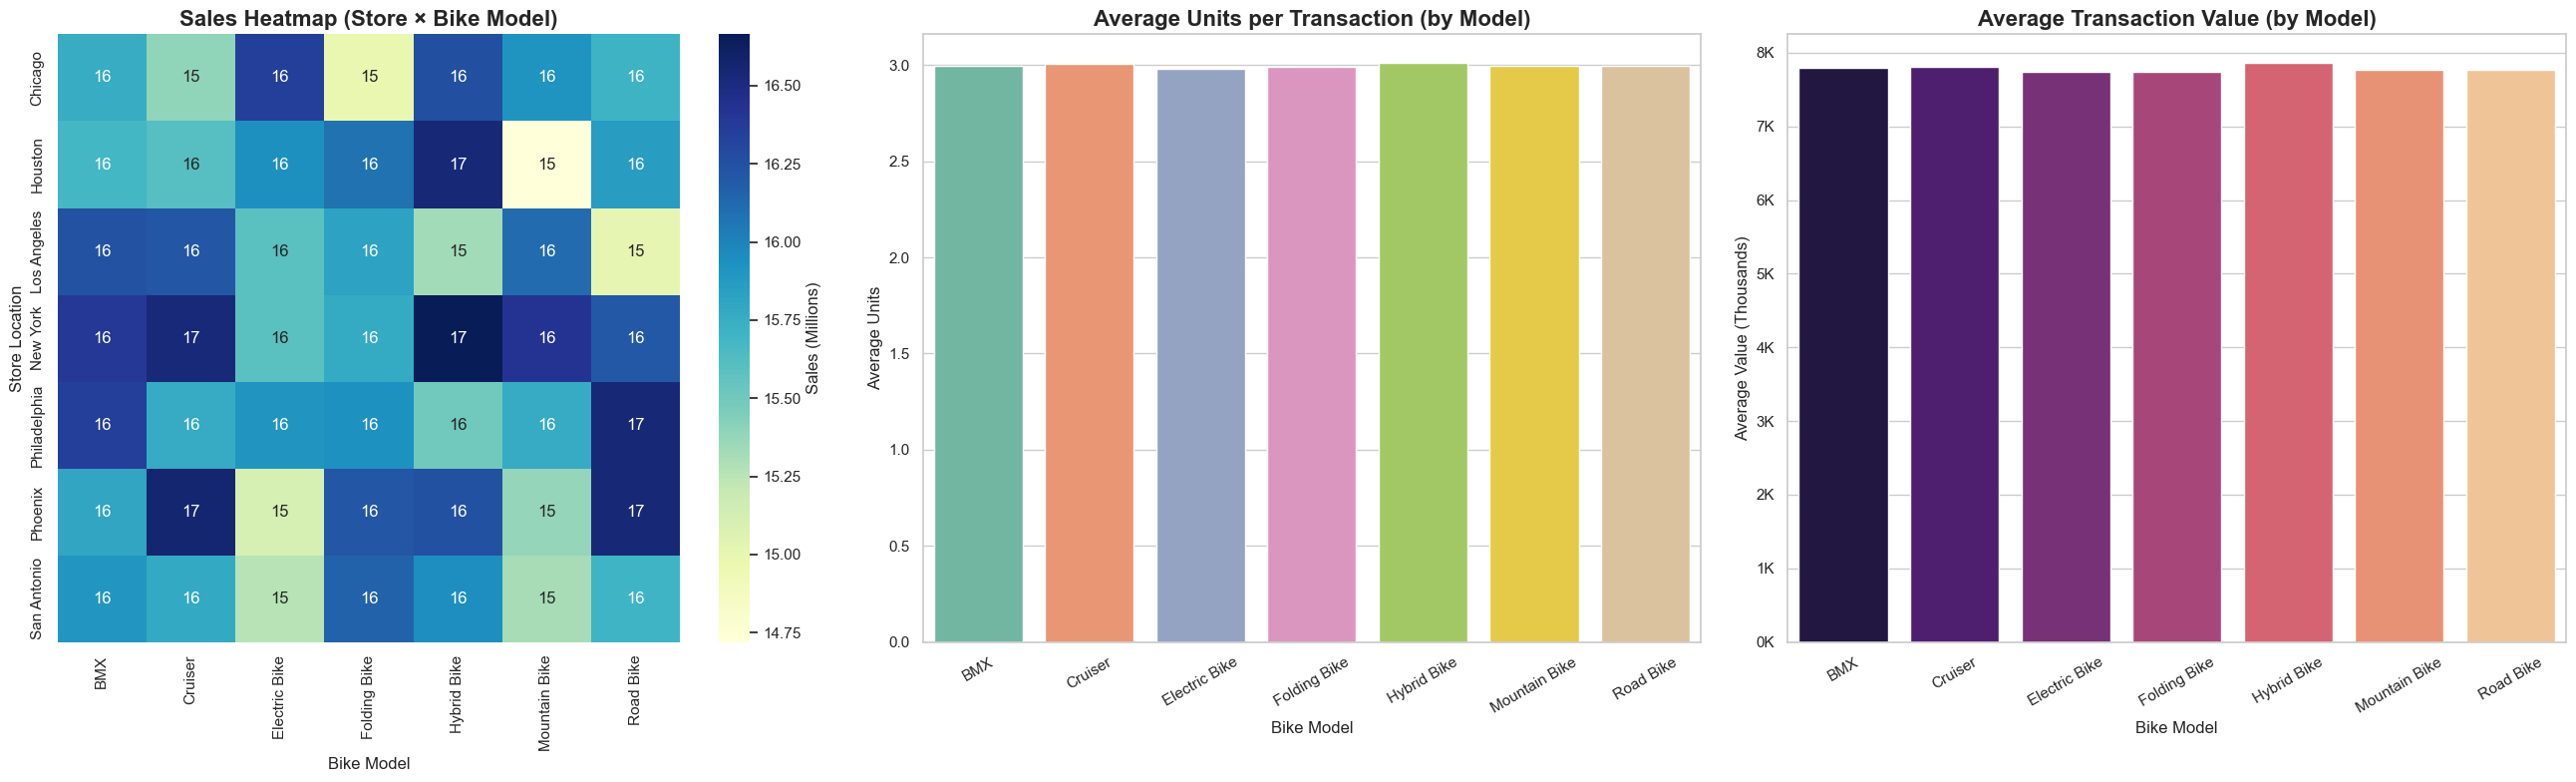

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick


store_model_sales = (
    df.groupby(["Store_Location", "Bike_Model"])["TotalPrice"]
    .sum()
    .reset_index()
)


pivot_sales = store_model_sales.pivot(index="Store_Location", columns="Bike_Model", values="TotalPrice")
display(
    pivot_sales.style.format("{:,.0f}").background_gradient(cmap="YlGnBu", axis=None)
)


model_quantity = (
    df.groupby("Bike_Model")["Quantity"]
    .mean()
    .reset_index()
)

display(
    model_quantity.set_index("Bike_Model")
    .style.format("{:.2f}")
    .background_gradient(cmap="coolwarm", axis=None)
)

model_avg_transaction = (
    df.groupby("Bike_Model")["TotalPrice"]
    .mean()
    .reset_index()
)

display(
    model_avg_transaction.set_index("Bike_Model")
    .style.format("{:,.0f}")
    .background_gradient(cmap="magma", axis=None)
)

fig, axes = plt.subplots(1, 3, figsize=(26,8))

# Plot 1: Heatmap 
sns.heatmap(pivot_sales/1e6, cmap="YlGnBu", ax=axes[0], annot=True, fmt=".0f", cbar_kws={'label': 'Sales (Millions)'})
axes[0].set_title("Sales Heatmap (Store × Bike Model)", fontsize=16, fontweight="bold")
axes[0].set_xlabel("Bike Model")
axes[0].set_ylabel("Store Location")

# Plot 2: Average Units Purchased by Model
sns.barplot(
    data=model_quantity,
    x="Bike_Model",
    y="Quantity",
    hue="Bike_Model",
    palette="Set2",
    legend=False,
    ax=axes[1]
)
axes[1].set_title("Average Units per Transaction (by Model)", fontsize=16, fontweight="bold")
axes[1].set_xlabel("Bike Model")
axes[1].set_ylabel("Average Units")
axes[1].tick_params(axis='x', rotation=30)

# Plot 3: Average Transaction Value by Model
sns.barplot(
    data=model_avg_transaction,
    x="Bike_Model",
    y="TotalPrice",
    hue="Bike_Model",
    palette="magma",
    legend=False,
    ax=axes[2]
)
axes[2].yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x/1e3)}K'))
axes[2].set_title("Average Transaction Value (by Model)", fontsize=16, fontweight="bold")
axes[2].set_xlabel("Bike Model")
axes[2].set_ylabel("Average Value (Thousands)")
axes[2].tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.show()


توی نقشه حرارتی می‌بینیم هر فروشگاه برای هر مدل دوچرخه چقدر فروش داشته رنگ پررنگ‌تر یعنی فروش بیشتر این کمک می‌کنه بفهمیم کدوم شهر یا فروشگاه توی کدوم مدل قوی‌تره

توی نمودار دوم میانگین تعداد دوچرخه در هر خرید رو نشون می‌ده مثلا بعضی مدل‌ها معمولا یکی یکی خریده می‌شن بعضی‌ها بیشتر از یکی این اطلاعات برای طراحی تخفیف خرید چندتایی خیلی مهمه

توی نمودار سوم میانگین ارزش هر خرید برای هر مدل دیده می‌شه اینجا می‌فهمیم کدوم مدل تراکنش‌های گرون‌تری داره و می‌تونه سود بیشتری بیاره

وقتی این سه تا رو با هم نگاه کنیم می‌فهمیم

بعضی مدل‌ها مشتری زیاد دارن ولی خریدها کوچیکه

بعضی مدل‌ها مشتری کمتر دارن ولی هر خریدشون گرون‌تر و پرارزش‌تره

هر فروشگاه روی بعضی مدل‌ها بهتر عمل می‌کنه و باید موجودی و تبلیغات براش شخصی‌سازی بشه

Monthly Sales Table:


,Date,Sales
0,January,"68,910,701"
1,February,"63,598,916"
2,March,"69,748,846"
3,April,"67,673,582"
4,May,"69,890,400"
5,June,"67,570,820"
6,July,"69,764,085"
7,August,"70,002,603"
8,September,"64,900,296"
9,October,"55,635,540"


Quarterly Sales Table:


,Quarter,TotalPrice
0,2020Q1,"40,792,116"
1,2020Q2,"40,544,714"
2,2020Q3,"41,149,968"
3,2020Q4,"41,737,694"
4,2021Q1,"39,824,766"
5,2021Q2,"40,585,563"
6,2021Q3,"41,469,086"
7,2021Q4,"41,655,830"
8,2022Q1,"40,656,036"
9,2022Q2,"41,097,583"


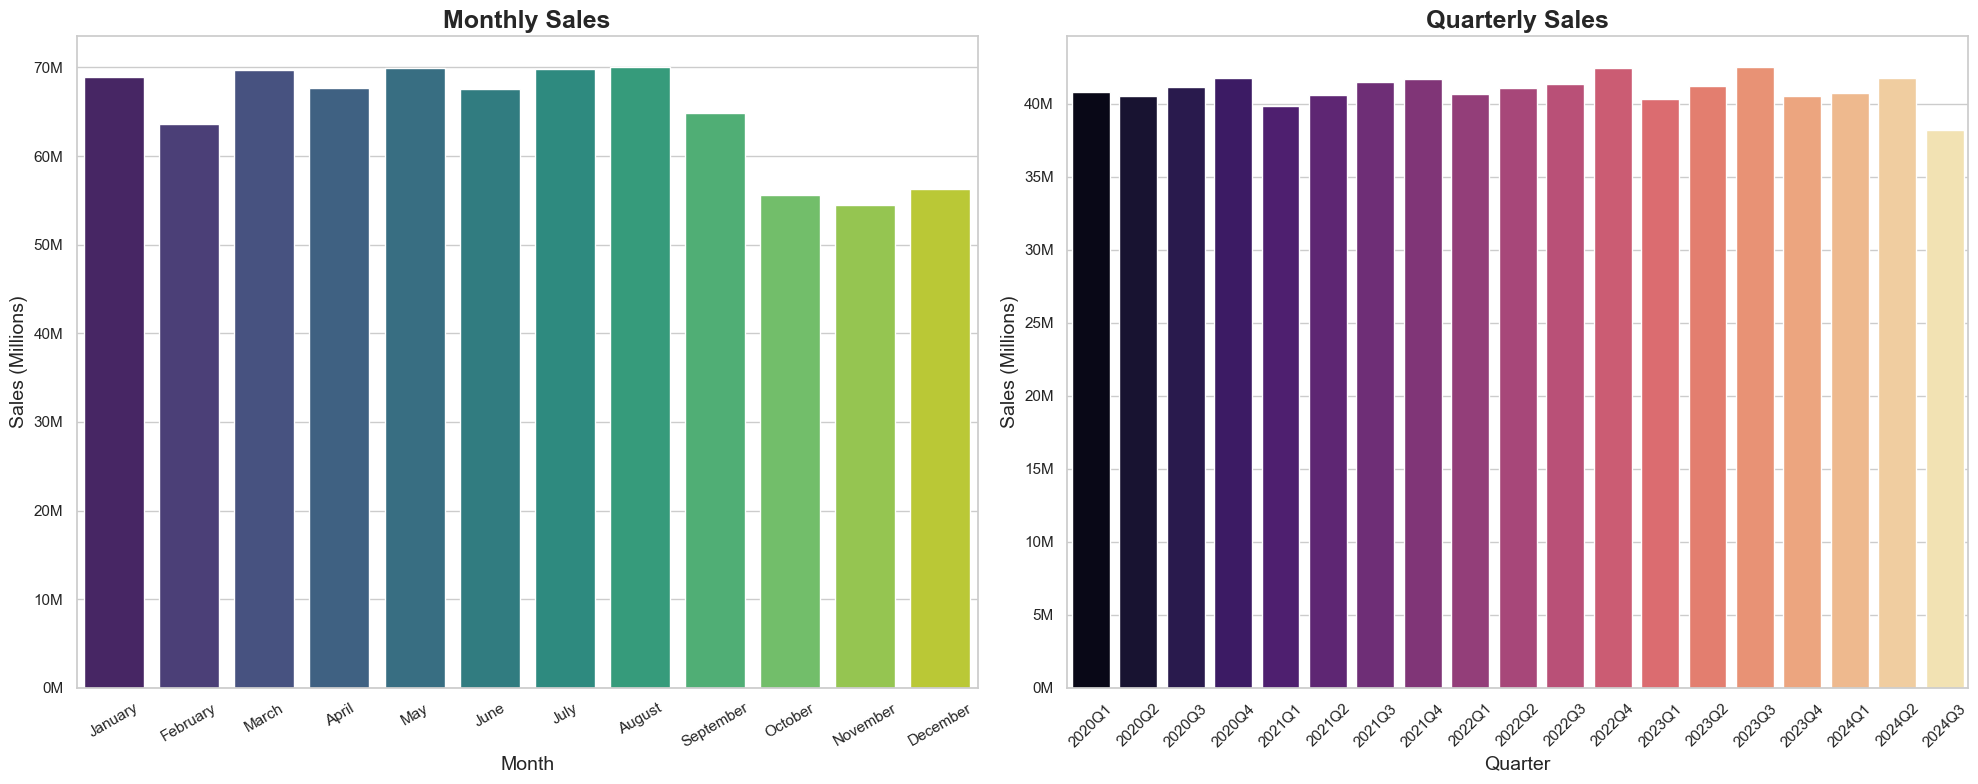

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick


df["Date"] = pd.to_datetime(df["Date"])

# Monthly sales
monthly_sales = (
    df.groupby(df["Date"].dt.month_name())["TotalPrice"]
    .sum()
    .reindex([
        "January","February","March","April","May","June",
        "July","August","September","October","November","December"
    ])
    .reset_index(name="Sales")
)

# Quarterly sales
quarterly_sales = (
    df.groupby([df["Date"].dt.to_period("Q")])["TotalPrice"]
    .sum()
    .reset_index()
    .rename(columns={"Date":"Quarter"})
)


print("Monthly Sales Table:")
display(
    monthly_sales.style.format({"Sales":"{:,.0f}"}).background_gradient(cmap="Blues")
)

print("Quarterly Sales Table:")
display(
    quarterly_sales.style.format({"TotalPrice":"{:,.0f}"}).background_gradient(cmap="Oranges")
)

# Plots
fig, axes = plt.subplots(1, 2, figsize=(20,8))

# Monthly
sns.barplot(
    data=monthly_sales,
    x="Date", y="Sales", hue="Date", legend=False, palette="viridis", ax=axes[0]
)
axes[0].yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x/1e6)}M'))
axes[0].set_title("Monthly Sales", fontsize=18, fontweight="bold")
axes[0].set_xlabel("Month", fontsize=14)
axes[0].set_ylabel("Sales (Millions)", fontsize=14)
axes[0].tick_params(axis="x", rotation=30)

# Quarterly
sns.barplot(
    data=quarterly_sales,
    x="Quarter", y="TotalPrice", hue="Quarter", legend=False, palette="magma", ax=axes[1]
)
axes[1].yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x/1e6)}M'))
axes[1].set_title("Quarterly Sales", fontsize=18, fontweight="bold")
axes[1].set_xlabel("Quarter", fontsize=14)
axes[1].set_ylabel("Sales (Millions)", fontsize=14)
axes[1].tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()


 تحلیل ماهانه
با دسته‌بندی داده‌ها بر اساس ماه متوجه می‌شیم که روند فروش در طول سال چه تغییری داشته

بعضی ماه‌ها مثل فروردین تا تیر (معادل ژانویه تا جولای در دیتاست) قله‌های فروش دیده میشه

از طرف دیگه ماه‌هایی مثل پاییز و زمستان افت محسوسی دارن
این موضوع می‌تونه به عوامل فصلی مثل شرایط آب و هوا یا تخفیف‌های خاص در نیمه اول سال مربوط باشه

 تحلیل فصلی
وقتی داده‌ها رو بر اساس فصل‌ها یا همون سه‌ماهه‌ها نگاه می‌کنیم تصویر ساده‌تر و شفاف‌تری به دست میاد

فروش در فصل اول و دوم سال معمولا بالاتره

اما از فصل سوم به بعد روند کاهشی شروع میشه

این روند نشون میده که باید استراتژی‌های تبلیغاتی و فروش در نیمه دوم سال قوی‌تر باشه تا افت جبران بشه

 مزیت جداول و نمودارها

جداول به ما امکان میدن مقادیر دقیق رو به صورت عددی ببینیم

نمودارهای میله‌ای درک سریع و تصویری از الگوها میدن

نمایش داده‌ها به میلیون باعث میشه اعداد خواناتر بشن و بهم‌ریختگی نمایشی نداشته باشن

 جمع‌بندی
این تحلیل نشون میده که الگوهای فصلی و ماهانه نقش مهمی در تصمیم‌گیری دارن
اگر فقط به فروش کل سال نگاه کنیم، متوجه نمی‌شیم که چه زمان‌هایی اوج یا افت فروش وجود داشته